![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador By: Ilbert Alarcon** 

### 1.Planteamiento de la problemática

Hemos sido contratados en el equipo de ciencia de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de atención en salud para un importante hospital. **Nuestro cliente desea saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización.** Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento. Dado que tienen en su base de datos algunos datos referentes a los pacientes y resultados de exámenes diagnósticos, de pacientes hospitalizados y no hospitalizados, nos han entregado esta información.  

Para ello, nuestro departamento de datos ha recopilado `Antecedentes del paciente`, `Morbilidad asociada al paciente` y `Antecedentes relacionados con la toma de la biopsia`y `Complicaciones infecciosas`. En la siguiente tabla, se encuentra un diccionario de datos asociado:

![image](https://user-images.githubusercontent.com/118769777/220240501-8c21461d-2de5-495b-954e-10fb9bf38014.png)

El departamente de datos advierte que hay algunos problemas de calidad de datos en la información suministrada por lo que el primer reto del equipo es realizar un análisis exploratorio de los datos con el fin de transformar y preparar las datos adecuadamente. 


### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




#### 2.0 Cargar Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import session_info
import ydata_profiling as pp

ModuleNotFoundError: No module named 'pandas'

#### 2.1 Cargar la base de datos

In [2]:
df=pd.read_csv('BBDD_Hospitalizacion_ILB.csv',encoding='utf-8')
df.head(10)

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO   4.0               NO   
1  56.0       NO                         NO   7.7               NO   
2  57.0       NO                         NO  29.0               SI   
3  56.0       NO                         NO   7.0               NO   
4  55.0       NO                         NO  29.0               SI   
5  55.0       SI                         SI   4.0               NO   
6  53.0       NO                         NO   7.0               NO   
7  67.0       NO                         NO   6.2               NO   
8  69.0       NO                         NO   6.0               NO   
9  44.0       NO                         NO   NaN               NO   

  VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
1                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
2                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
3                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
4                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
5                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
6                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
7                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
8                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
9                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   

   NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
0                        12.0  NO                                NO     NEG   
1                        12.0  NO                                NO     NEG   
2                        24.0  NO                                NO     NEG   
3                        12.0  NO                                NO     NEG   
4                        24.0  NO                                NO     NEG   
5                        12.0  NO                                NO     NEG   
6                        12.0  NO                                NO     NEG   
7                        12.0  NO                                NO     NEG   
8                        12.0  NO                                NO     NEG   
9                        12.0  NO                                NO     NEG   

  NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
0                                                  1                          
1                                                  1                          
2                                                  1                          
3                                                  1                          
4                                                  1                          
5                                                  2                          
6                                                  2                          
7                                                  2                          
8                                                  2                          
9                                                  2                          

  FIEBRE ITU           TIPO DE CULTIVO AGENTE AISLADO  \
0     SI  NO                        NO             NO   
1     SI  NO                        NO             NO   
2     SI  NO               HEMOCULTIVO         E.COLI   
3     SI  NO                        NO             NO   
4     SI  NO               HEMOCULTIVO         E.COLI   
5     NO  NO                        NO             NO   
6     SI  SI                UROCULTIVO         E.COLI   
7     SI  SI  HEMOCULTIVO Y UROCULTIVO         E.COLI   
8     SI  NO                        NO             NO   
9     SI  NO                        NO             NO   

                               PATRON DE RESISTENCIA HOSPITALIZACION  \
0                                                 NO              SI   
1              

In [3]:
num_filas, num_columnas = df.shape

print(f"El dataset tiene {num_filas} filas y {num_columnas} columnas.")

El dataset tiene 570 filas y 20 columnas.


#### 2.2 ¿Qué tipo de dato son las variables del conjunto de datos?

In [4]:
df.dtypes

EDAD                                                                         float64
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

#### 2.3 Conversión de tipos de datos.

In [5]:
df['EDAD'] = df['EDAD'].fillna(0)
df['EDAD'] = df['EDAD'].astype(int)

In [6]:
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].fillna(0)
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].astype(int)

In [7]:
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].fillna(0)
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].astype(int)

In [8]:
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].fillna(0)
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].astype(int)

In [9]:
df.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'NUME_DIAS POST BIOPSIA'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     570 non-null    int32  
 1   DIABETES                                 568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES               568 non-null    object 
 3   PSA                                      564 non-null    float64
 4   BIOPSIAS PREVIAS                         566 non-null    object 
 5   VOLUMEN PROSTATICO                       567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS               570 non-null    int32  
 8   CUP                                      568 non-null    object 
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA        566 non-null    object 
 10  BIOPSIA                                  568 non-n

In [11]:
df.describe()

EDAD         PSA  NUMERO DE MUESTRAS TOMADAS  \
count  570.000000  564.000000                  570.000000   
mean    63.657895   13.271401                   12.950877   
std     10.006877   15.668966                    3.989138   
min      0.000000    0.600000                    0.000000   
25%     59.000000    5.600000                   12.000000   
50%     64.000000    8.000000                   12.000000   
75%     69.000000   15.000000                   12.000000   
max    151.000000  100.000000                   24.000000   

       DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
count               570.000000                570.000000  
mean                  0.164912                  0.014035  
std                   0.956431                  0.196130  
min                   0.000000                  0.000000  
25%                   0.000000                  0.000000  
50%                   0.000000                  0.000000  
75%                   0.000000                  0.000000  
max                  12.000000                  3.000000

#### 2.4 Revisando los Valores Nulos, creando uin Dataframe

In [12]:
df.isnull().sum()

EDAD                                        0
DIABETES                                    2
HOSPITALIZACIÓN ULTIMO MES                  2
PSA                                         6
BIOPSIAS PREVIAS                            4
VOLUMEN PROSTATICO                          3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS     2
NUMERO DE MUESTRAS TOMADAS                  0
CUP                                         2
ENF. CRONICA PULMONAR OBSTRUCTIVA           4
BIOPSIA                                     2
NUME_DIAS POST BIOPSIA                      2
FIEBRE                                      2
ITU                                         2
TIPO DE CULTIVO                             2
AGENTE AISLADO                             19
PATRON DE RESISTENCIA                       2
HOSPITALIZACION                             5
DIAS HOSPITALIZACION MQ                     0
DIAS HOSPITALIZACIÓN UPC                    0
dtype: int64

In [13]:
filas_con_nulos = df[df.isnull().any(axis=1)]

df_nulos = pd.DataFrame(filas_con_nulos)

df_nulos

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES    PSA BIOPSIAS PREVIAS  \
9      44       NO                         NO    NaN               NO   
26     75       NO                         NO  25.00               NO   
31     63       NO                         NO  10.80               NO   
76     57       NO                         NO    NaN               NO   
92     58       NO                         NO   7.80              NaN   
99     70       NO                         NO   7.20               NO   
100    74       NO                         NO   5.80               NO   
103    60       NO                         NO    NaN               SI   
106    65       NO                         NO   5.97               NO   
109    61       NO                         NO   7.00               NO   
115    56       NO                         NO   4.00               NO   
116    55       NO                         NO  17.00               NO   
121    62       NO                         NO    NaN               NO   
126    74       NO                         NO   8.00               NO   
128    69       NO                         NO  13.40               SI   
129    63       NO                         NO  11.00               NO   
130    63       NO                         NO  21.30               SI   
138    64       NO                         NO  15.60               NO   
139    71       NO                         NO   5.40               NO   
146    58       NO                         NO  17.00               NO   
151    66       NO                         NO  11.50               NO   
156    66       NO                         NO   5.10               NO   
167    68       NO                         NO  15.00               NO   
170    69       NO                         NO   5.10               NO   
565    69       NO                         NO   4.43              NaN   
566    67       NO                         NO   8.00               NO   
567    59       NO                         NO   9.00               SI   
568     0      NaN                        NaN    NaN              NaN   
569     0      NaN                        NaN    NaN              NaN   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
9                   NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
26                  SI          FLUOROQUINOLONA_AMINOGLICÓSIDO   
31                  NO          FLUOROQUINOLONA_AMINOGLICÓSIDO   
76                  NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
92                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
99                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
100                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
103                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
106                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
109                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
115                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
116                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
121                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
126                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
128                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
129                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
130                 SI                                   OTROS   
138                 SI            CEFALOSPORINA_AMINOGLUCOCIDO   
139                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
146                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
151                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
156                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
167                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
170                 SI                           OROQUINOLONAS   
565                NaN          FLUOROQUINOLONA_AMINOGLICOSIDO   
566                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
567                 SI          

#### 2.5¿Cuál es la proporción de valores nulos por cada variable?

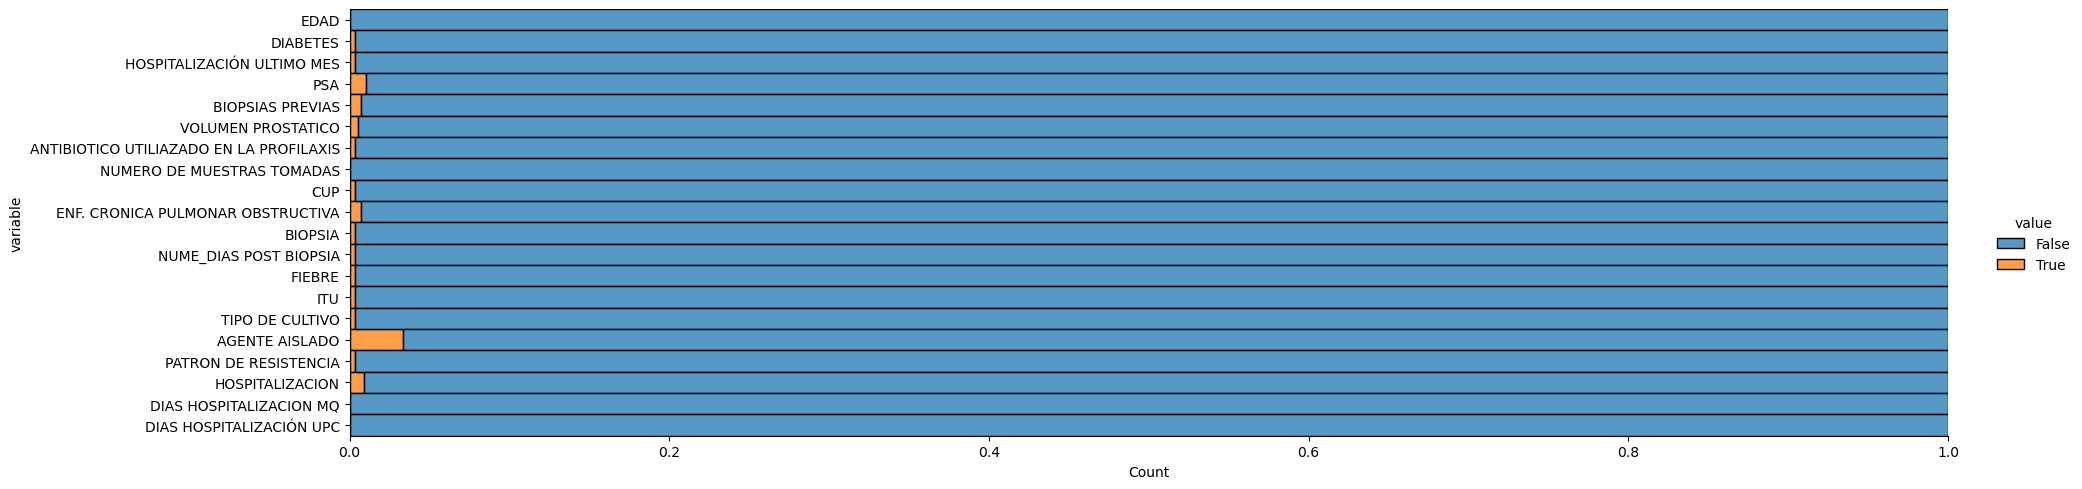

In [14]:
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=4
            )
        )
    )
)
plt.show()

#### 2.6 Eliminar Filas que no Aportan informacion

In [15]:
df = df.drop(index= [568, 569])

de acuerdo a la descripcion de datos anteriormente realizada, se evidencia que las celdas 568 y 569, presentan muchos valores nulos, los cuales no aportan informacion al analisis, esto puede suceder por multiples factores, por lo tanto para el presente analisis se decide eliminarlos

# Medidas de tendencia central y Medidas de Dispersion

In [16]:
df.describe(include='all')

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES         PSA  \
count   568.000000      568                        568  564.000000   
unique         NaN        2                          2         NaN   
top            NaN       NO                         NO         NaN   
freq           NaN      505                        563         NaN   
mean     63.882042      NaN                        NaN   13.271401   
std       9.281517      NaN                        NaN   15.668966   
min      39.000000      NaN                        NaN    0.600000   
25%      59.000000      NaN                        NaN    5.600000   
50%      64.000000      NaN                        NaN    8.000000   
75%      69.000000      NaN                        NaN   15.000000   
max     151.000000      NaN                        NaN  100.000000   

       BIOPSIAS PREVIAS VOLUMEN PROSTATICO  \
count               566                567   
unique                2                  2   
top                  NO                 SI   
freq                510                408   
mean                NaN                NaN   
std                 NaN                NaN   
min                 NaN                NaN   
25%                 NaN                NaN   
50%                 NaN                NaN   
75%                 NaN                NaN   
max                 NaN                NaN   

       ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  NUMERO DE MUESTRAS TOMADAS  \
count                                      568                  568.000000   
unique                                       5                         NaN   
top             FLUOROQUINOLONA_AMINOGLICOSIDO                         NaN   
freq                                       448                         NaN   
mean                                       NaN                   12.996479   
std                                        NaN                    3.921180   
min                                        NaN                    4.000000   
25%                                        NaN                   12.000000   
50%                                        NaN                   12.000000   
75%                                        NaN                   12.000000   
max                                        NaN                   24.000000   

        CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA NUME_DIAS POST BIOPSIA  \
count   567                               566     568                    568   
unique    2                                 4      11                      6   
top      NO                                NO     NEG                     NO   
freq    563                               546     322                    542   
mean    NaN                               NaN     NaN                    NaN   
std     NaN                               NaN     NaN                    NaN   
min     NaN                               NaN     NaN                    NaN   
25%     NaN                               NaN     NaN                    NaN   
50%     NaN                               NaN     NaN                    NaN   
75%     NaN                               NaN     NaN                    NaN   
max     NaN                               NaN     NaN                    NaN   

       FIEBRE  ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
count     568  568             568            551                   568   
unique      2    2               4              3                     5   
top        NO   NO              NO             NO                    NO   
freq      531  562             560            543                   561   
mean      NaN  NaN             NaN            NaN                   NaN   
std       NaN  NaN             NaN            NaN                   NaN   
min       NaN  NaN             NaN            NaN                   NaN   
25%       NaN  NaN             NaN            NaN                   NaN   
50%       NaN  NaN             NaN            N

#### 2.7 Reemplazar valores numericos nulos o faltantes

In [17]:
df.describe(include=[np.number])

EDAD         PSA  NUMERO DE MUESTRAS TOMADAS  \
count  568.000000  564.000000                  568.000000   
mean    63.882042   13.271401                   12.996479   
std      9.281517   15.668966                    3.921180   
min     39.000000    0.600000                    4.000000   
25%     59.000000    5.600000                   12.000000   
50%     64.000000    8.000000                   12.000000   
75%     69.000000   15.000000                   12.000000   
max    151.000000  100.000000                   24.000000   

       DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
count               568.000000                568.000000  
mean                  0.165493                  0.014085  
std                   0.958066                  0.196474  
min                   0.000000                  0.000000  
25%                   0.000000                  0.000000  
50%                   0.000000                  0.000000  
75%                   0.000000                  0.000000  
max                  12.000000                  3.000000

In [18]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
null_counts = df[num_vars].isnull().sum()

# Imprime los resultados
print("Cantidad de valores nulos o NaN en variables numéricas:")
print(null_counts)

Cantidad de valores nulos o NaN en variables numéricas:
EDAD                          0
PSA                           4
NUMERO DE MUESTRAS TOMADAS    0
DIAS HOSPITALIZACION MQ       0
DIAS HOSPITALIZACIÓN UPC      0
dtype: int64


In [19]:
media = df['PSA'].mean()
df['PSA'] = df['PSA'].fillna(media)

#### 2.8 Reemplazar valores Categoricos nulos o faltantes

In [20]:
num_vars = df.select_dtypes(include=['object']).columns
null_counts = df[num_vars].isnull().sum()

# Imprime los resultados
print("Cantidad de valores nulos o NaN en variables Categoricas:")
print(null_counts)

Cantidad de valores nulos o NaN en variables Categoricas:
DIABETES                                    0
HOSPITALIZACIÓN ULTIMO MES                  0
BIOPSIAS PREVIAS                            2
VOLUMEN PROSTATICO                          1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS     0
CUP                                         1
ENF. CRONICA PULMONAR OBSTRUCTIVA           2
BIOPSIA                                     0
NUME_DIAS POST BIOPSIA                      0
FIEBRE                                      0
ITU                                         0
TIPO DE CULTIVO                             0
AGENTE AISLADO                             17
PATRON DE RESISTENCIA                       0
HOSPITALIZACION                             3
dtype: int64


In [21]:
categorical_columns = df.select_dtypes(include='object')

# Calcula la moda de las variables categóricas
mode_values = categorical_columns.mode()

# Imprime la moda de cada variable categórica
for column in mode_values.columns:
    print(f"Moda de '{column}': {mode_values[column].values[0]}")
    df[column].fillna(mode_values[column].values[0], inplace=True)

Moda de 'DIABETES': NO
Moda de 'HOSPITALIZACIÓN ULTIMO MES': NO
Moda de 'BIOPSIAS PREVIAS': NO
Moda de 'VOLUMEN PROSTATICO': SI
Moda de 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': FLUOROQUINOLONA_AMINOGLICOSIDO
Moda de 'CUP': NO
Moda de 'ENF. CRONICA PULMONAR OBSTRUCTIVA': NO
Moda de 'BIOPSIA': NEG
Moda de 'NUME_DIAS POST BIOPSIA': NO
Moda de 'FIEBRE': NO
Moda de 'ITU': NO
Moda de 'TIPO DE CULTIVO': NO
Moda de 'AGENTE AISLADO': NO
Moda de 'PATRON DE RESISTENCIA': NO
Moda de 'HOSPITALIZACION': NO


In [22]:
df['NUME_DIAS POST BIOPSIA'] = df['NUME_DIAS POST BIOPSIA'].replace('NO',0)
df['NUME_DIAS POST BIOPSIA'] = df['NUME_DIAS POST BIOPSIA'].astype(int)

#### 2.9 Detección de Outlayers en variables Numericas

In [23]:
hosp_color = {
    'SI': '#34495E',
    'NO': '#DF0101'
}

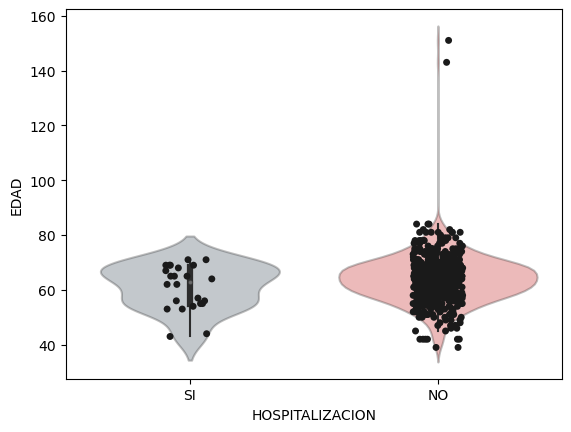

In [24]:
ax = sns.violinplot(
    data=df,
    x='HOSPITALIZACION',
    palette=hosp_color,
    y='EDAD',
    widths=0.5
)

# Modificar la transparencia de los violines
for patch in ax.collections:
    patch.set_alpha(0.3)  # Ajustar el valor para cambiar la transparencia de los violines

ax = sns.stripplot(
    data=df,
    x='HOSPITALIZACION',
    y='EDAD',
    color='.1'
)

# Mostrar el gráfico
plt.show()

In [25]:
df.sort_values('EDAD',ascending=False)

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
181   151       NO                         NO   5.7               NO   
161   143       SI                         NO   6.8               NO   
46     84       NO                         NO  38.9               NO   
48     84       NO                         NO  40.0               NO   
531    84       NO                         NO  78.0               NO   
..    ...      ...                        ...   ...              ...   
56     42       NO                         NO  53.0               NO   
159    42       NO                         NO   6.0               NO   
414    42       NO                         NO   6.0               NO   
481    39       NO                         NO   3.9               NO   
224    39       NO                         NO   3.6               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
181                 SI                                   OTROS   
161                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
46                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
48                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
531                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
..                 ...                                     ...   
56                  NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
159                 NO            CEFALOSPORINA_AMINOGLUCOCIDO   
414                 NO            CEFALOSPORINA_AMINOGLUCOCIDO   
481                 NO            CEFALOSPORINA_AMINOGLUCOCIDO   
224                 NO            CEFALOSPORINA_AMINOGLUCOCIDO   

     NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  \
181                          12  NO                                NO   
161                          12  NO                                NO   
46                            6  SI                                NO   
48                            6  SI                                NO   
531                          10  NO                                NO   
..                          ...  ..                               ...   
56                           12  NO                                NO   
159                          12  NO                                NO   
414                          12  NO                                NO   
481                          12  NO                                NO   
224                          12  NO                                NO   

                        BIOPSIA  NUME_DIAS POST BIOPSIA FIEBRE ITU  \
181                         NEG                       0     NO  NO   
161                         NEG                       0     NO  NO   
46   ADENOCARCINOMA GLEASON 10                        0     NO  NO   
48   ADENOCARCINOMA GLEASON 10                        0     NO  NO   
531   ADENOCARCINOMA GLEASON 8                        0     NO  NO   
..                          ...                     ...    ...  ..   
56    ADENOCARCINOMA GLEASON 7                        0     NO  NO   
159                         NEG                       0     NO  NO   
414                         NEG                       0     NO  NO   
481                         NEG                       0     NO  NO   
224                         NEG                       0     NO  NO   

    TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA HOSPITALIZACION  \
181              NO             NO                    NO              NO   
161              NO             NO                    NO              NO   
46               NO             NO                    NO              NO   
48               NO             NO                    NO              NO   
531              NO             NO                    NO              NO   
..              ...            ...                   ...             ...   
56               NO             NO                    NO              NO   
159              NO  

Conforme a que la edad minima para el presente analisis inicia con una edad de 39, las filas 181 y 161, los cuales presentan valores fuera de los rangos intercuartilicos se modifican pasando de 151 a 51 y 143 a 43.

In [26]:
df.loc[181, 'EDAD'] = 51
df.loc[161, 'EDAD'] = 43

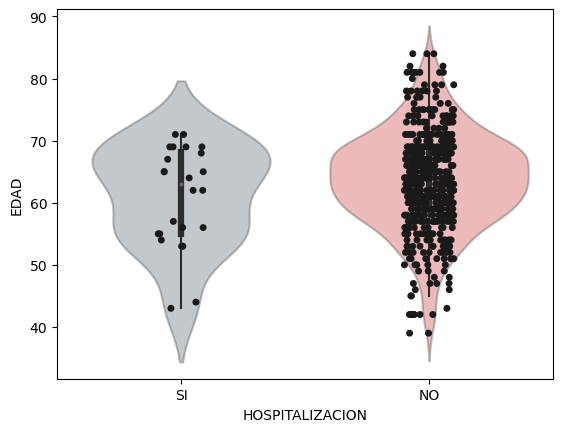

In [27]:
ax = sns.violinplot(
    data=df,
    x='HOSPITALIZACION',
    palette=hosp_color,
    y='EDAD',
    widths=0.5
)

# Modificar la transparencia de los violines
for patch in ax.collections:
    patch.set_alpha(0.3)  # Ajustar el valor para cambiar la transparencia de los violines

ax = sns.stripplot(
    data=df,
    x='HOSPITALIZACION',
    y='EDAD',
    color='.1'
)

# Mostrar el gráfico
plt.show()

Valores Estadisticos descriptivos limpios

In [28]:
df.describe(include='all')

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES         PSA  \
count   568.000000      568                        568  568.000000   
unique         NaN        2                          2         NaN   
top            NaN       NO                         NO         NaN   
freq           NaN      505                        563         NaN   
mean     63.529930      NaN                        NaN   13.271401   
std       7.915726      NaN                        NaN   15.613598   
min      39.000000      NaN                        NaN    0.600000   
25%      59.000000      NaN                        NaN    5.675000   
50%      64.000000      NaN                        NaN    8.000000   
75%      69.000000      NaN                        NaN   15.000000   
max      84.000000      NaN                        NaN  100.000000   

       BIOPSIAS PREVIAS VOLUMEN PROSTATICO  \
count               568                568   
unique                2                  2   
top                  NO                 SI   
freq                512                409   
mean                NaN                NaN   
std                 NaN                NaN   
min                 NaN                NaN   
25%                 NaN                NaN   
50%                 NaN                NaN   
75%                 NaN                NaN   
max                 NaN                NaN   

       ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  NUMERO DE MUESTRAS TOMADAS  \
count                                      568                  568.000000   
unique                                       5                         NaN   
top             FLUOROQUINOLONA_AMINOGLICOSIDO                         NaN   
freq                                       448                         NaN   
mean                                       NaN                   12.996479   
std                                        NaN                    3.921180   
min                                        NaN                    4.000000   
25%                                        NaN                   12.000000   
50%                                        NaN                   12.000000   
75%                                        NaN                   12.000000   
max                                        NaN                   24.000000   

        CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  NUME_DIAS POST BIOPSIA  \
count   568                               568     568              568.000000   
unique    2                                 4      11                     NaN   
top      NO                                NO     NEG                     NaN   
freq    564                               548     322                     NaN   
mean    NaN                               NaN     NaN                0.132042   
std     NaN                               NaN     NaN                0.745471   
min     NaN                               NaN     NaN                0.000000   
25%     NaN                               NaN     NaN                0.000000   
50%     NaN                               NaN     NaN                0.000000   
75%     NaN                               NaN     NaN                0.000000   
max     NaN                               NaN     NaN                9.000000   

       FIEBRE  ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
count     568  568             568            568                   568   
unique      2    2               4              3                     5   
top        NO   NO              NO             NO                    NO   
freq      531  562             560            560                   561   
mean      NaN  NaN             NaN            NaN                   NaN   
std       NaN  NaN             NaN            NaN                   NaN   
min       NaN  NaN             NaN            NaN                   NaN   
25%       NaN  NaN             NaN            NaN                   NaN   
50%       NaN  NaN             NaN 

# ¿Cómo puedo visualizar la distribución de las variables Numericas?

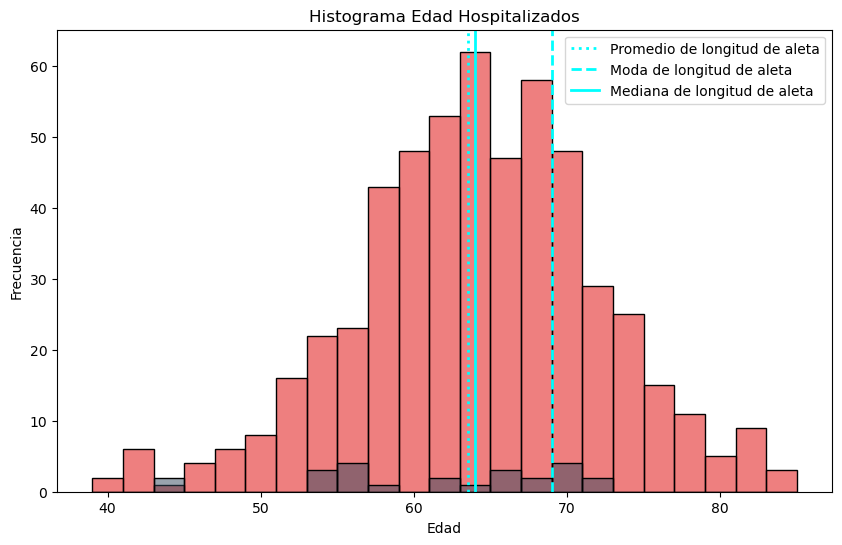

In [29]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x='EDAD',
    palette=hosp_color,
    hue='HOSPITALIZACION',
    binwidth=2
)

plt.axvline(
    x=df.EDAD.mean(),
    color='cyan',
    linestyle='dotted',
    linewidth=2,
    label='Promedio de longitud de aleta'
)

plt.axvline(
    x=df.EDAD.mode()[0],
    color='cyan',
    linestyle='dashed',
    linewidth=2,
    label='Moda de longitud de aleta'
)

plt.axvline(
    x=df.EDAD.median(),
    color='cyan',
    linestyle='solid',
    linewidth=2,
    label='Mediana de longitud de aleta'
)

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma Edad Hospitalizados')
plt.legend()

plt.show()

en la Anterio grafica de identifica que la mayoría de los valores se encuentran alrededor de la media, por lo tanto se puede utilizar medidas de dispersión, como la desviación estándar, para comprender la variabilidad de los datos alrededor de la media, se identifica que los datos tienen una distribucion normal.

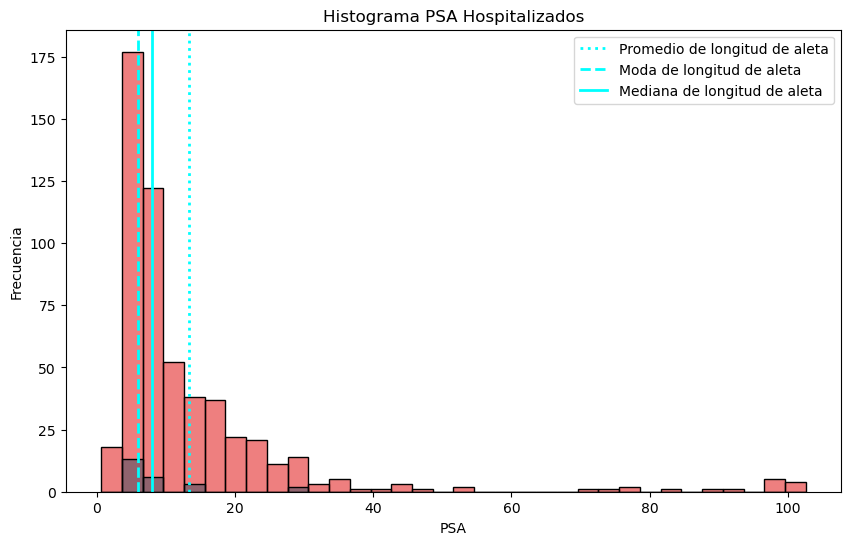

In [30]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x='PSA',
    palette=hosp_color,
    hue='HOSPITALIZACION',
    binwidth=3
)

plt.axvline(
    x=df.PSA.mean(),
    color='cyan',
    linestyle='dotted',
    linewidth=2,
    label='Promedio de longitud de aleta'
)

plt.axvline(
    x=df.PSA.mode()[0],
    color='cyan',
    linestyle='dashed',
    linewidth=2,
    label='Moda de longitud de aleta'
)

plt.axvline(
    x=df.PSA.median(),
    color='cyan',
    linestyle='solid',
    linewidth=2,
    label='Mediana de longitud de aleta'
)

plt.xlabel('PSA')
plt.ylabel('Frecuencia')
plt.title('Histograma PSA Hospitalizados')
plt.legend()

plt.show()

En la anterior grafica se evidencia un sesgo positivo en la distribucion de frecuencias, la mayoría de los valores se encuentran en la parte izquierda del gráfico, con una cola larga hacia la derecha,La media es mayor que la mediana,Puede indicar la presencia de valores atípicos o extremos en la dirección de la cola derecha.

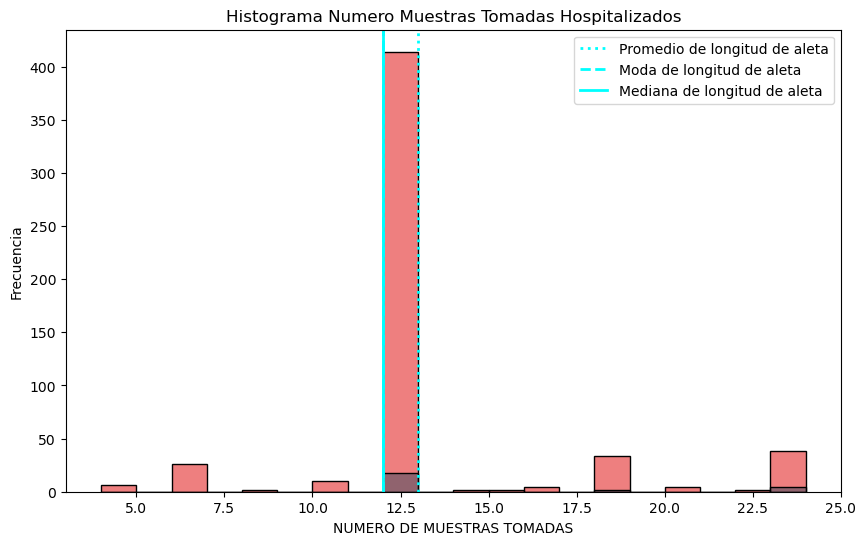

In [31]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x='NUMERO DE MUESTRAS TOMADAS',
    palette=hosp_color,
    hue='HOSPITALIZACION',
    binwidth=1
)

plt.axvline(
    x=df['NUMERO DE MUESTRAS TOMADAS'].mean(),
    color='cyan',
    linestyle='dotted',
    linewidth=2,
    label='Promedio de longitud de aleta'
)

plt.axvline(
    x=df['NUMERO DE MUESTRAS TOMADAS'].mode()[0],
    color='cyan',
    linestyle='dashed',
    linewidth=2,
    label='Moda de longitud de aleta'
)

plt.axvline(
    x=df['NUMERO DE MUESTRAS TOMADAS'].median(),
    color='cyan',
    linestyle='solid',
    linewidth=2,
    label='Mediana de longitud de aleta'
)

plt.xlabel('NUMERO DE MUESTRAS TOMADAS')
plt.ylabel('Frecuencia')
plt.title('Histograma Numero Muestras Tomadas Hospitalizados')
plt.legend()

plt.show()

en la Anterio grafica de identifica que la mayoría de los valores se encuentran alrededor de la media, por lo tanto se puede utilizar medidas de dispersión, como la desviación estándar, para comprender la variabilidad de los datos alrededor de la media, se identifica que los datos tienen una distribucion normal.

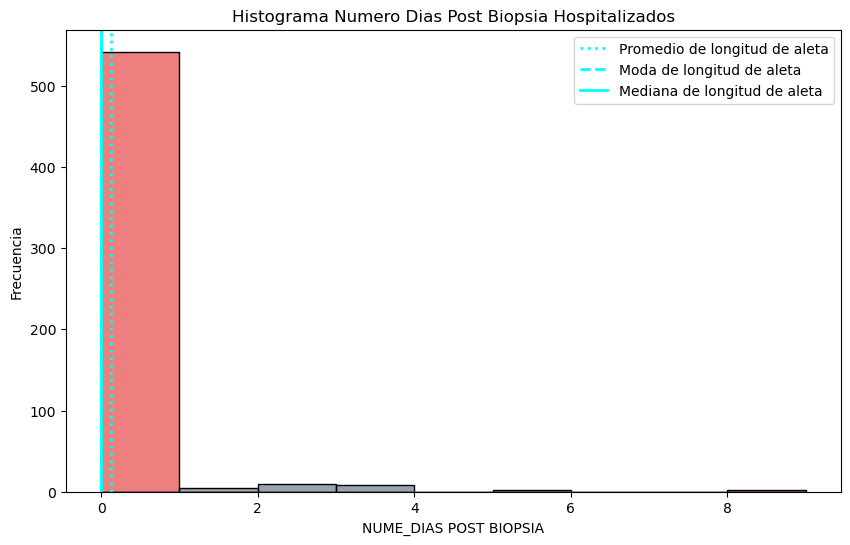

In [32]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x='NUME_DIAS POST BIOPSIA',
    palette=hosp_color,
    hue='HOSPITALIZACION',
    binwidth=1
)

plt.axvline(
    x=df['NUME_DIAS POST BIOPSIA'].mean(),
    color='cyan',
    linestyle='dotted',
    linewidth=2,
    label='Promedio de longitud de aleta'
)

plt.axvline(
    x=df['NUME_DIAS POST BIOPSIA'].mode()[0],
    color='cyan',
    linestyle='dashed',
    linewidth=2,
    label='Moda de longitud de aleta'
)

plt.axvline(
    x=df['NUME_DIAS POST BIOPSIA'].median(),
    color='cyan',
    linestyle='solid',
    linewidth=2,
    label='Mediana de longitud de aleta'
)

plt.xlabel('NUME_DIAS POST BIOPSIA')
plt.ylabel('Frecuencia')
plt.title('Histograma Numero Dias Post Biopsia Hospitalizados')
plt.legend()

plt.show()

En la anterior grafica se evidencia un sesgo positivo en la distribucion de frecuencias, la mayoría de los valores se encuentran en la parte izquierda del gráfico, con una cola larga hacia la derecha,La media es mayor que la mediana,Puede indicar la presencia de valores atípicos o extremos en la dirección de la cola derecha.

# Estableciendo relaciones

Analisis Preliminar de Correlaciones

In [33]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

De acuerdo con la exploracion preliminar de datos, hospitalizacion MQ es la variable objetivo, lo anterior se deduce a su alta correlacion con las variables tanto numericas como categoricas, esta variable Hospitalizacion MQ alimentaria la variable Hospotalizacion.

# Verificacion de Hipotesis de correlaciones

#### Coeficientes de Correlaciones

In [34]:
df.corr()

EDAD       PSA  NUMERO DE MUESTRAS TOMADAS  \
EDAD                        1.000000  0.185089                   -0.203075   
PSA                         0.185089  1.000000                   -0.203618   
NUMERO DE MUESTRAS TOMADAS -0.203075 -0.203618                    1.000000   
NUME_DIAS POST BIOPSIA      0.056564 -0.053949                    0.049031   
DIAS HOSPITALIZACION MQ    -0.030422 -0.033121                    0.091232   
DIAS HOSPITALIZACIÓN UPC   -0.034292  0.043941                    0.146577   

                            NUME_DIAS POST BIOPSIA  DIAS HOSPITALIZACION MQ  \
EDAD                                      0.056564                -0.030422   
PSA                                      -0.053949                -0.033121   
NUMERO DE MUESTRAS TOMADAS                0.049031                 0.091232   
NUME_DIAS POST BIOPSIA                    1.000000                 0.611393   
DIAS HOSPITALIZACION MQ                   0.611393                 1.000000   
DIAS HOSPITALIZACIÓN UPC                  0.131778                 0.249942   

                            DIAS HOSPITALIZACIÓN UPC  
EDAD                                       -0.034292  
PSA                                         0.043941  
NUMERO DE MUESTRAS TOMADAS                  0.146577  
NUME_DIAS POST BIOPSIA                      0.131778  
DIAS HOSPITALIZACION MQ                     0.249942  
DIAS HOSPITALIZACIÓN UPC                    1.000000

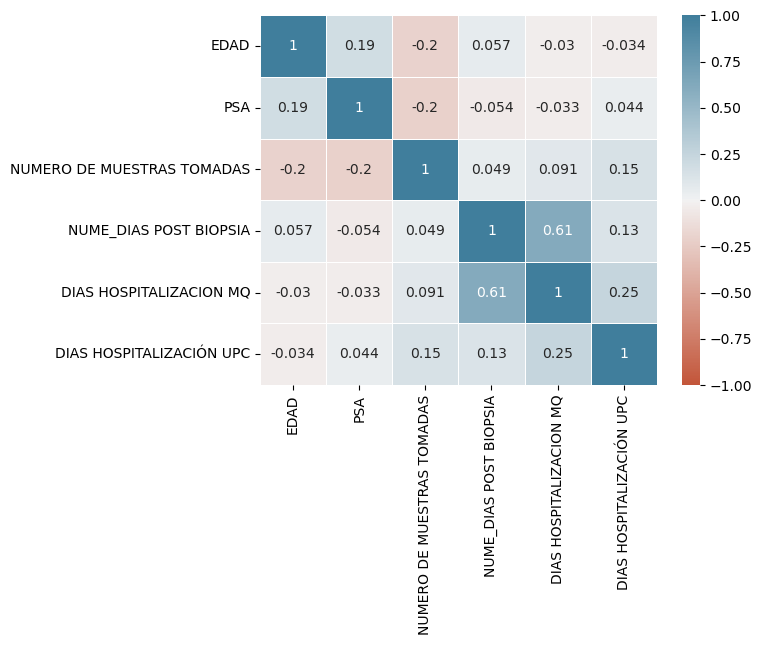

In [35]:
sns.heatmap(
    data=df.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)
plt.show()

como se evidencia en la grafica anterior existe una baja correlacion entre las variables numericas y los dias de Hospitalizacion MQ, esto no quiere indicar la furza de esta correlacion, sin embargo para reforzar el analisis las variables categoricas de convertiran en variables categoricas numericas discretas para poder identificar su relacion con la variable objetivo

# Conversion de Variables categoricas en Variables numericas Discretas

In [36]:
for columna in df.select_dtypes(include='object'):
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Valores únicos en la columna 'DIABETES': ['NO' 'SI']
Valores únicos en la columna 'HOSPITALIZACIÓN ULTIMO MES': ['NO' 'SI']
Valores únicos en la columna 'BIOPSIAS PREVIAS': ['NO' 'SI']
Valores únicos en la columna 'VOLUMEN PROSTATICO': ['SI' 'NO']
Valores únicos en la columna 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': ['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'FLUOROQUINOLONA_AMINOGLICÓSIDO' 'OTROS']
Valores únicos en la columna 'CUP': ['NO' 'SI']
Valores únicos en la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA': ['NO' 'SI, EPOC' 'SI, ASMA' 'SI']
Valores únicos en la columna 'BIOPSIA': ['NEG' 'ADENOCARCINOMA GLEASON 6 ' 'ADENOCARCINOMA GLEASON 7 '
 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 10 '
 'ADENOCARCINOMA GLEASON 9 ' 'ADENOCARCINOMA GLEASON 8 ' 'PROSTATITIS'
 'HIPERPLASIA PROSTATICA' 'ADENOCARCINOMA GLEASON 7'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
Valores únicos en la columna 'FIEBRE': ['SI' 'NO']
Valores únicos en la colum

In [37]:
df=(
    df
    .assign(
        NUM_DIABETES=lambda df: df.DIABETES.replace(['SI','NO'],[1,0])
    )
)

df['NUM_DIABETES'] = df['NUM_DIABETES'].astype(int)

In [38]:
df=(
    df
    .assign(
        NUM_HOSPITALIZACIÓN_ULTIMO_MES=lambda df: df['HOSPITALIZACIÓN ULTIMO MES'].replace(['SI','NO'],[1,0])
    )
)

df['NUM_HOSPITALIZACIÓN_ULTIMO_MES'] = df['NUM_HOSPITALIZACIÓN_ULTIMO_MES'].astype(int)

In [39]:
df=(
    df
    .assign(
        NUM_BIOPSIAS_PREVIAS=lambda df: df['BIOPSIAS PREVIAS'].replace(['SI','NO'],[1,0])
    )
)

df['NUM_BIOPSIAS_PREVIAS'] = df['NUM_BIOPSIAS_PREVIAS'].astype(int)

In [40]:
df=(
    df
    .assign(
        NUM_VOLUMEN_PROSTATICO=lambda df: df['VOLUMEN PROSTATICO'].replace(['SI','NO'],[1,0])
    )
)

df['NUM_VOLUMEN_PROSTATICO'] = df['NUM_VOLUMEN_PROSTATICO'].astype(int)

In [41]:
df=(
    df
    .assign(
        NUM_ANTIB_UTI_PROFILAXIS=lambda df: df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace(['FLUOROQUINOLONA_AMINOGLICOSIDO','CEFALOSPORINA_AMINOGLUCOCIDO',
                                                                                                   'OROQUINOLONAS','FLUOROQUINOLONA_AMINOGLICÓSIDO','OTROS'],[0,1,2,3,4])
    )
)

df['NUM_ANTIB_UTI_PROFILAXIS'] = df['NUM_ANTIB_UTI_PROFILAXIS'].astype(int)

In [42]:
df=(
    df
    .assign(
        NUM_CUP=lambda df: df['CUP'].replace(['SI','NO'],[1,0])
    )
)

df['NUM_CUP'] = df['NUM_CUP'].astype(int)

In [43]:
df=(
    df
    .assign(
        NUM_ENF_CRO_PULMONAR=lambda df: df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace(['NO','SI, EPOC','SI, ASMA','SI'],[0,1,2,3])
    )
)

df['NUM_ENF_CRO_PULMONAR'] = df['NUM_ENF_CRO_PULMONAR'].astype(int)

In [44]:
df['BIOPSIA'] = df['BIOPSIA'].str.strip()

df=(
    df
    .assign(
        NUM_BIOPSIA=lambda df: df['BIOPSIA'].replace(['NEG','ADENOCARCINOMA GLEASON 6','ADENOCARCINOMA GLEASON 7','ADENOCARCINOMA GLEASON 10','ADENOCARCINOMA GLEASON 9',
                                                       'ADENOCARCINOMA GLEASON 8','PROSTATITIS','HIPERPLASIA PROSTATICA',
                                                       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'],[0,1,2,3,4,5,6,7,8])
    )
)

df['NUM_BIOPSIA'] = df['NUM_BIOPSIA'].astype(int)

In [45]:
df=(
    df
    .assign(
        NUM_FIEBRE=lambda df: df['FIEBRE'].replace(['SI','NO'],[1,0])
    )
)

df['NUM_FIEBRE'] = df['NUM_FIEBRE'].astype(int)

In [46]:
df=(
    df
    .assign(
        NUM_ITU=lambda df: df['ITU'].replace(['SI','NO'],[1,0])
    )
)

df['NUM_ITU'] = df['NUM_ITU'].astype(int)

In [47]:
df=(
    df
    .assign(
        NUM_TIPO_CULTIVO=lambda df: df['TIPO DE CULTIVO'].replace(['NO','HEMOCULTIVO','UROCULTIVO','HEMOCULTIVO Y UROCULTIVO'],[0,1,2,3])
    )
)

df['NUM_TIPO_CULTIVO'] = df['NUM_TIPO_CULTIVO'].astype(int)

In [48]:
df=(
    df
    .assign(
        NUM_AGENTE_AISLADO=lambda df: df['AGENTE AISLADO'].replace(['NO','E.COLI','PSEUDOMONAS AERUGINOSA'],[0,1,2])
    )
)

df['NUM_AGENTE_AISLADO'] = df['NUM_AGENTE_AISLADO'].astype(int)

In [49]:
df=(
    df
    .assign(
        NUM_PAT_RESISTENCIA=lambda df: df['PATRON DE RESISTENCIA'].replace(['NO',' AMPI R, CIPRO R, GENTA R, SULFA M R','RESISTENTE A AMPI, CIPRO Y GENTA',
                                                                            'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
                                                                            'MULTI SENSIBLE'],[0,1,2,3,4])
    )
)

df['NUM_PAT_RESISTENCIA'] = df['NUM_PAT_RESISTENCIA'].astype(int)

In [50]:
df=(
    df
    .assign(
        NUM_HOSPITALIZACION=lambda df: df['HOSPITALIZACION'].replace(['SI','NO'],[1,0])
    )
)

df['NUM_HOSPITALIZACION'] = df['NUM_HOSPITALIZACION'].astype(int)

# Nuevamente se revisa la Correlacion

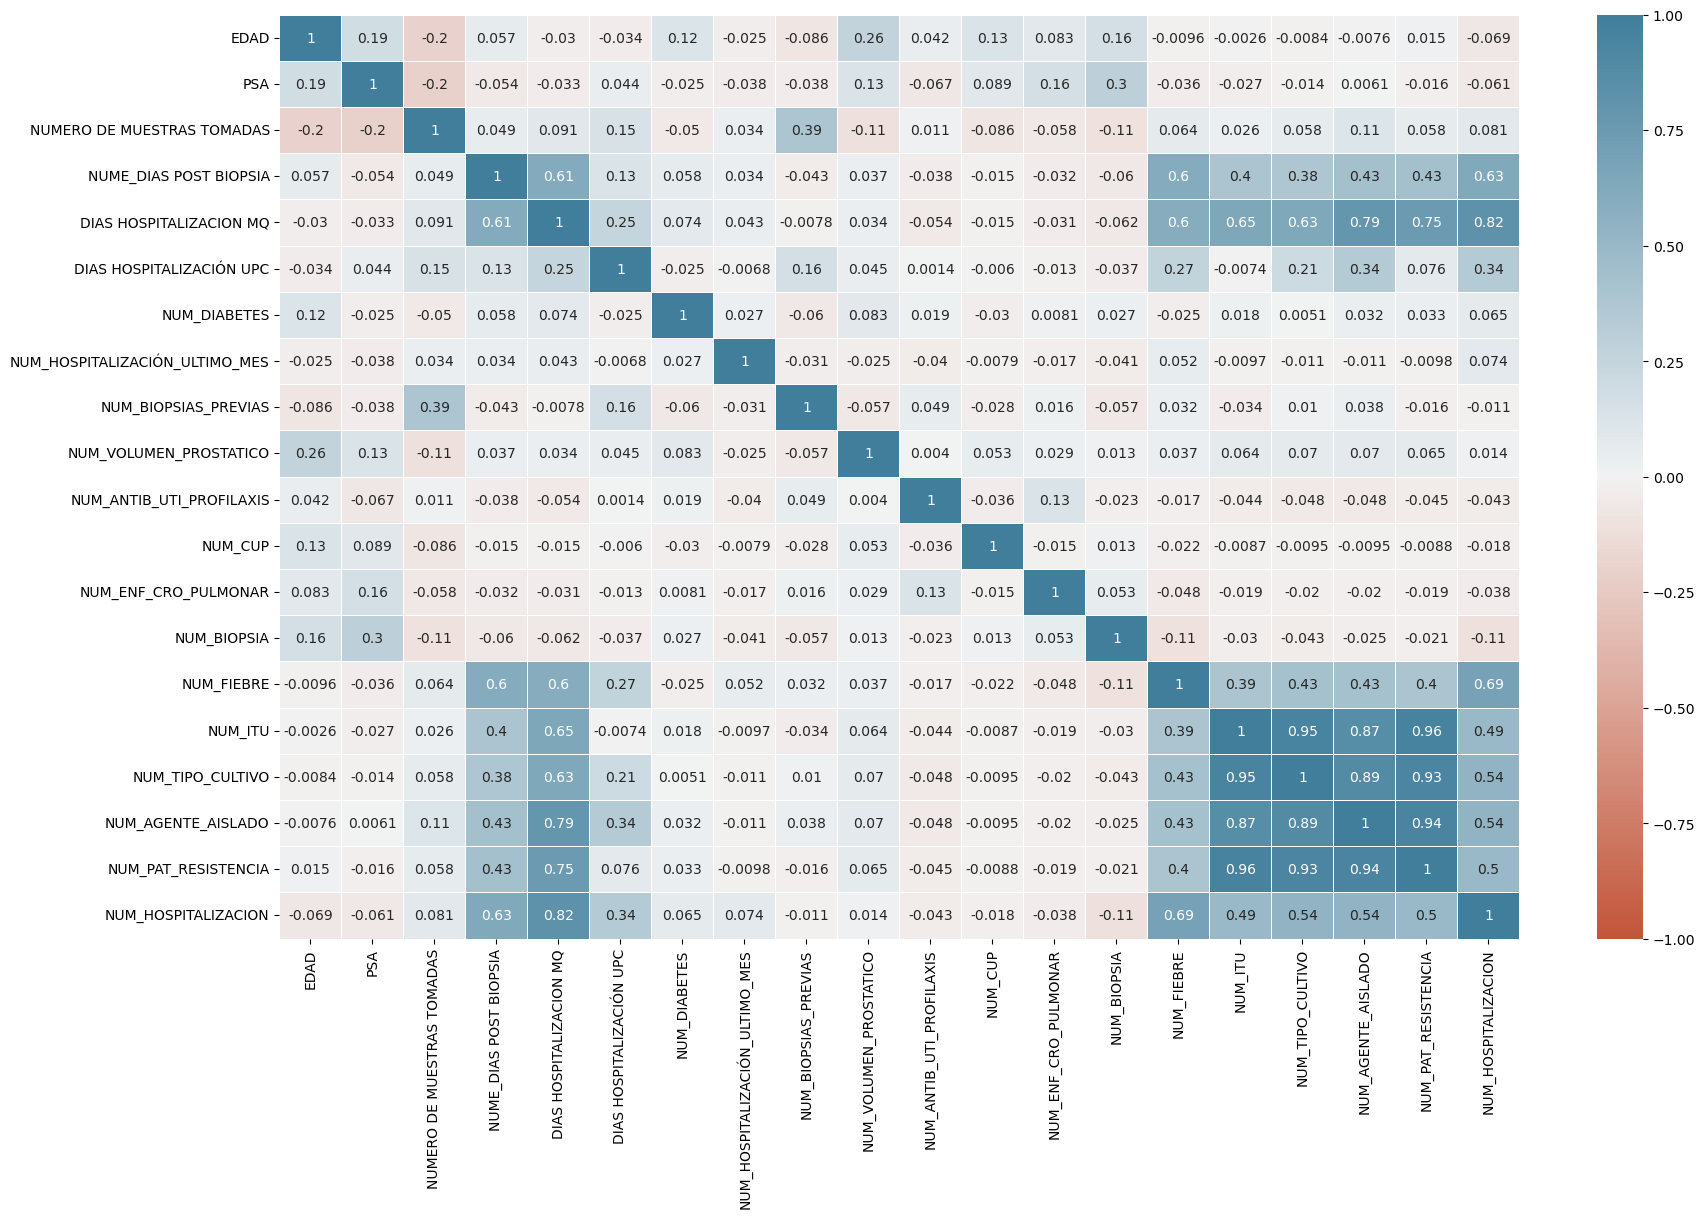

In [51]:
plt.figure(figsize=(20, 12))

sns.heatmap(
    data=df.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)
plt.show()

Con la anterior imagen se mejora de identificacion de correlacion con la variable objetivo, con lo cual nos indica que la variable objetivo **DIAS HOSPITALIZACION MQ** se relaciona con las variables en gran medida con **DIAS POST BIOBSIA, FIEBRE, ITU, TIPO CULTIVO, AGENTE AISLADO, PATRON DE RESISTENCIAS**

# --------------------

# INFORMACION DE LA SESION

In [52]:
session_info.show()